In [46]:
# import libraries

# for Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# for Data Visualization
import seaborn as sns
import missingno as msno

# Data Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# !pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation Metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')


In [20]:
# load data set
df = pd.read_csv(r"C:\Users\Dr. Ubon Essien\OneDrive\10Alytics_2\CapStoneProject_Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [267]:
# examine the columns and features of the data

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [268]:
# investigate data set for anomalies; number of features and rows, missing data, data types etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [269]:
# statistical analysis of the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


<Axes: >

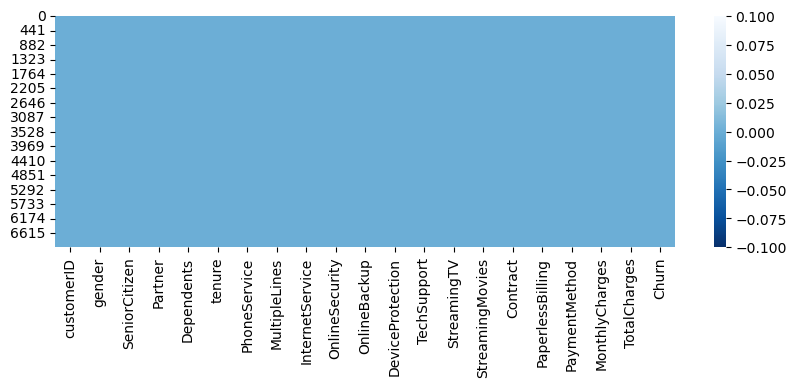

In [270]:
# Checking for missing data
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r")

# Exploratory data analysis

## univariate analysis

In [586]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

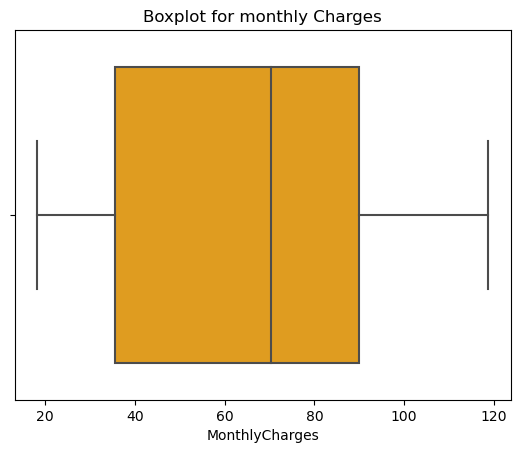

In [587]:
# checking for outliers
sns.boxplot(x=df['MonthlyCharges'], color = "orange")
plt.xlabel('MonthlyCharges')
plt.title('Boxplot for monthly Charges')
plt.show()

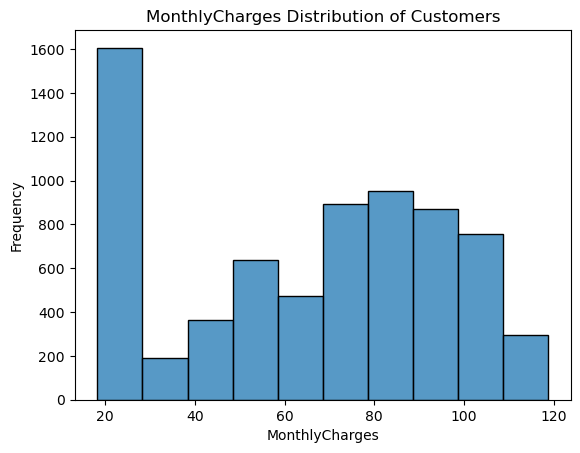

In [588]:
# Monthly Charges Distribution of Customers
sns.histplot(x = df['MonthlyCharges'],bins =10)
plt.title('MonthlyCharges Distribution of Customers')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frequency');

In [21]:
from sklearn.preprocessing import LabelEncoder

# encode categorical data into num data
cate = df.dtypes == "object"
cat_feat = list(cate[cate].index)

encoder = LabelEncoder()
for x in cat_feat:
    df[x] = encoder.fit_transform(df[x])


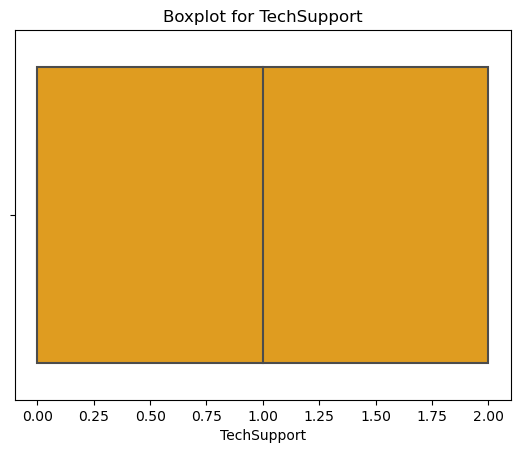

In [599]:
# checking for outliers
sns.boxplot(x=df['TechSupport'], color = "orange")
plt.xlabel('TechSupport')
plt.title('Boxplot for TechSupport')
plt.show()

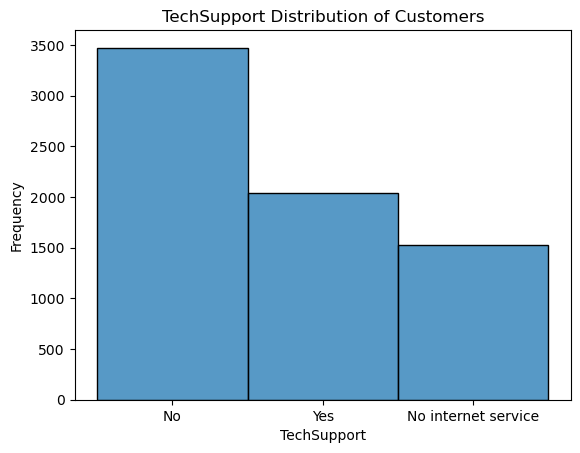

In [590]:
# Tech Support Distribution of Customers
sns.histplot(x = df['TechSupport'],bins =3)
plt.title('TechSupport Distribution of Customers')
plt.xlabel('TechSupport')
plt.ylabel('Frequency');

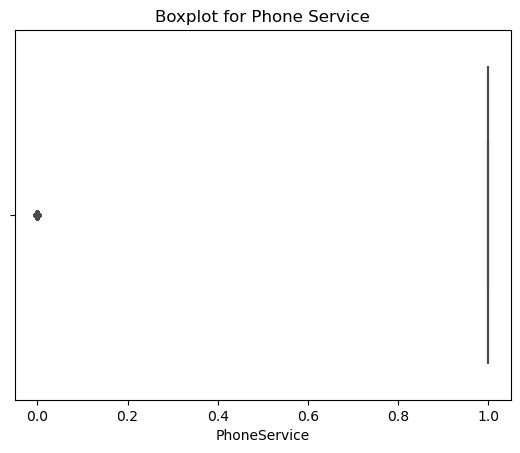

In [277]:
# checking for outliers
sns.boxplot(x=df['PhoneService'], color = "orange")
plt.xlabel('PhoneService')
plt.title('Boxplot for Phone Service')
plt.show()


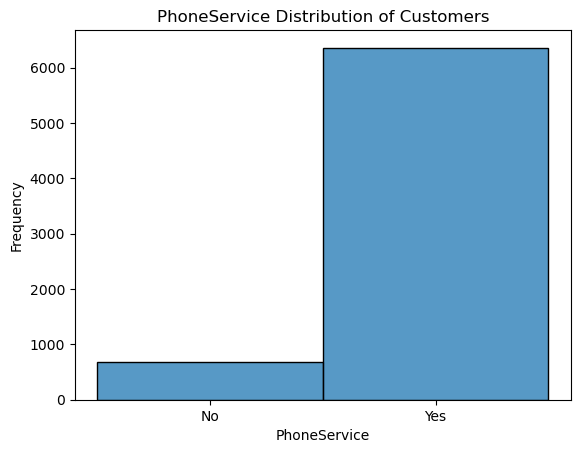

In [591]:
# 'PhoneService' Distribution of Customers
sns.histplot(x = df['PhoneService'],bins =2)
plt.title('PhoneService Distribution of Customers')
plt.xlabel('PhoneService')
plt.ylabel('Frequency');

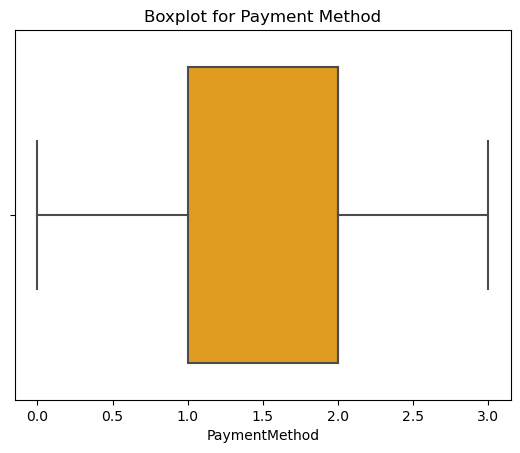

In [600]:
# checking for outliers
sns.boxplot(x=df['PaymentMethod'], color = "orange")
plt.xlabel('PaymentMethod')
plt.title('Boxplot for Payment Method')
plt.show()



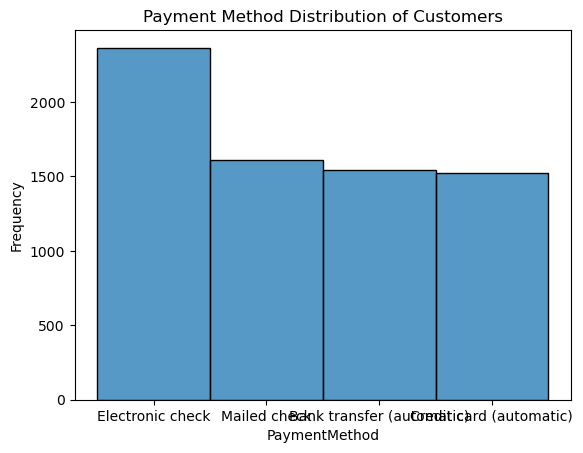

In [322]:
# 'PaymentMethod' Distribution of Customers
sns.histplot(x = df['PaymentMethod'],bins =4)
plt.title('Payment Method Distribution of Customers')
plt.xlabel('PaymentMethod')
plt.ylabel('Frequency');

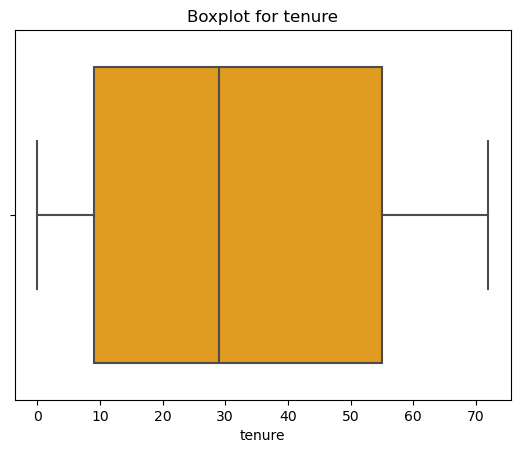

In [593]:
# checking for outliers
sns.boxplot(x=df['tenure'], color = "orange")
plt.xlabel('tenure')
plt.title('Boxplot for tenure')
plt.show()


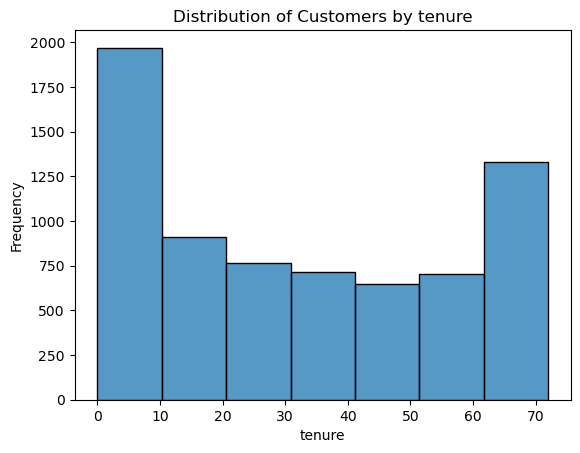

In [22]:
# Distribution of Customers by tenure
sns.histplot(x = df['tenure'],bins =7)
plt.title('Distribution of Customers by tenure')
plt.xlabel('tenure')
plt.ylabel('Frequency');


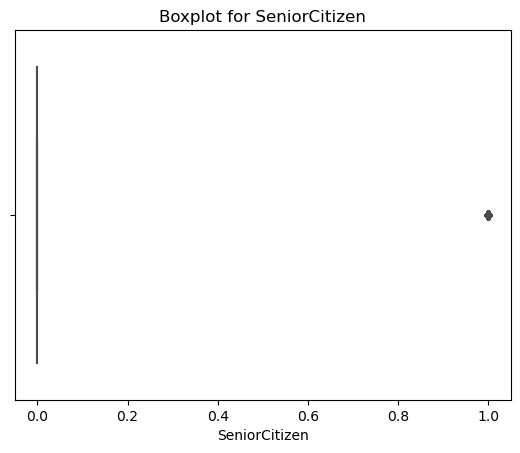

In [594]:
# checking for outliers
sns.boxplot(x=df['SeniorCitizen'], color = "orange")
plt.xlabel('SeniorCitizen')
plt.title('Boxplot for SeniorCitizen')
plt.show()



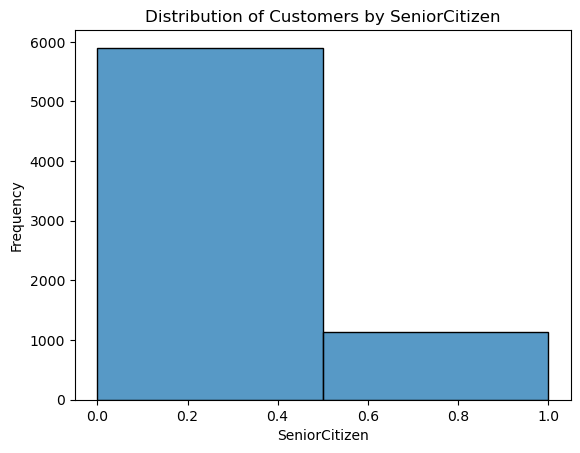

In [325]:
# Distribution of Customers by Contract
sns.histplot(x = df['SeniorCitizen'],bins =2)
plt.title('Distribution of Customers by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Frequency');


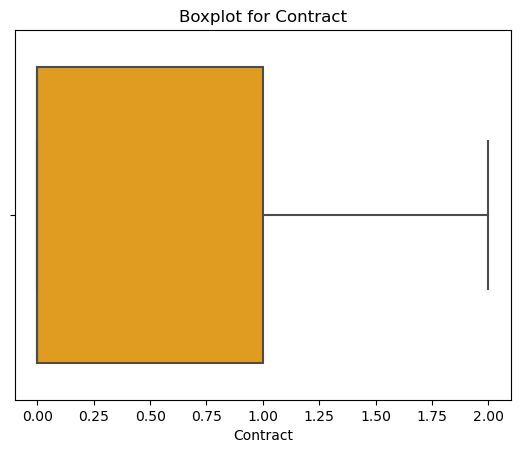

In [601]:
# checking for outliers
sns.boxplot(x=df['Contract'],color = "orange")
plt.xlabel('Contract')
plt.title('Boxplot for Contract')
plt.show()


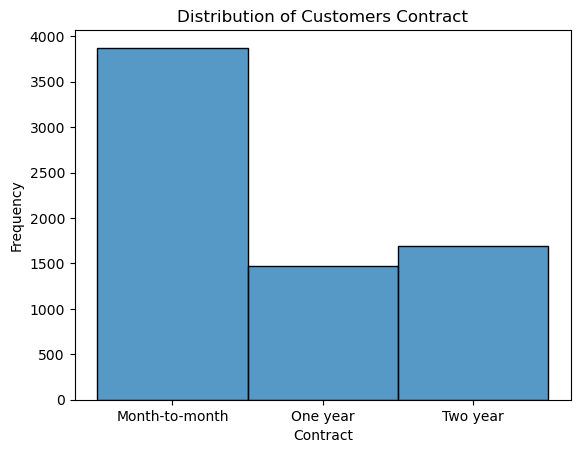

In [596]:
# Distribution of Customers by Contract
sns.histplot(x = df['Contract'],bins =2)
plt.title('Distribution of Customers Contract')
plt.xlabel('Contract')
plt.ylabel('Frequency');

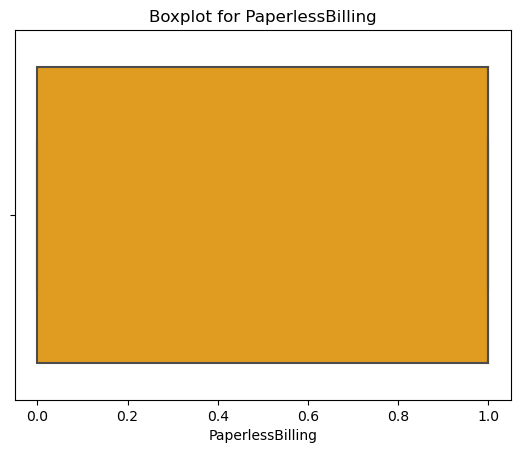

In [602]:
# check for outliers
sns.boxplot(x=df['PaperlessBilling'],color = "orange")
plt.xlabel('PaperlessBilling')
plt.title('Boxplot for PaperlessBilling')
plt.show()


# Exploratory Data Analysis-Bivariate Analysis



## investigating gender of customer by the target variable, Churn.

Text(0.5, 1.0, 'Total number of customers')

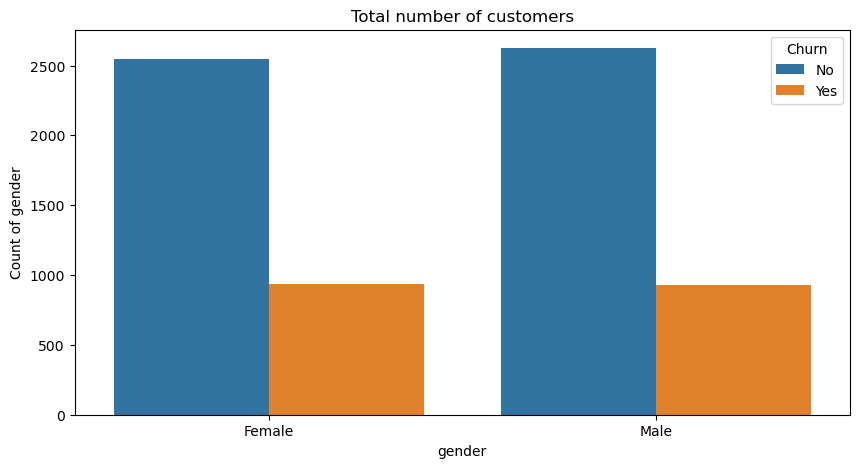

In [298]:
# investigating the 'gender' of customers
plt.figure(figsize = (10, 5))
sns.countplot(x='gender', data=df, hue='Churn')
plt.xlabel('gender')
plt.ylabel('Count of gender')
plt.title('Total number of customers')


## Relationship between InternetServices and the target variable, Churn

Text(0.5, 1.0, 'Total number of customers')

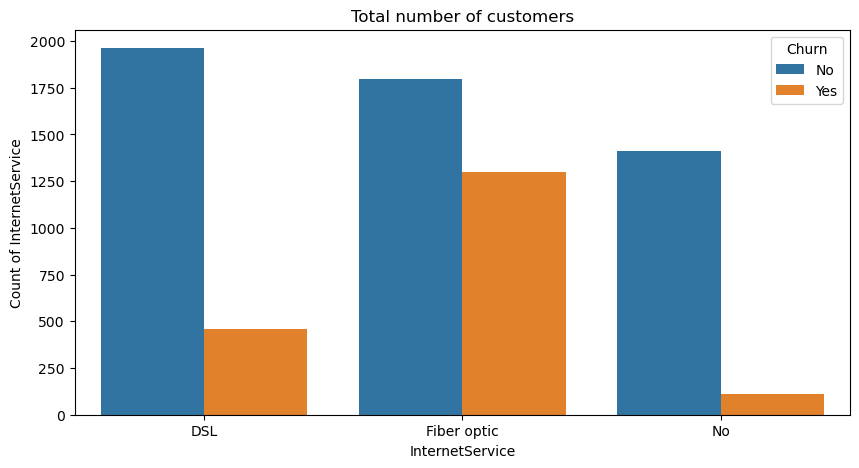

In [299]:
# investigating the InternetService by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='InternetService', data=df, hue='Churn')
plt.xlabel('InternetService')
plt.ylabel('Count of InternetService')
plt.title('Total number of customers')


## Relationship between payment method and Churn

Text(0.5, 1.0, 'Total number of customers')

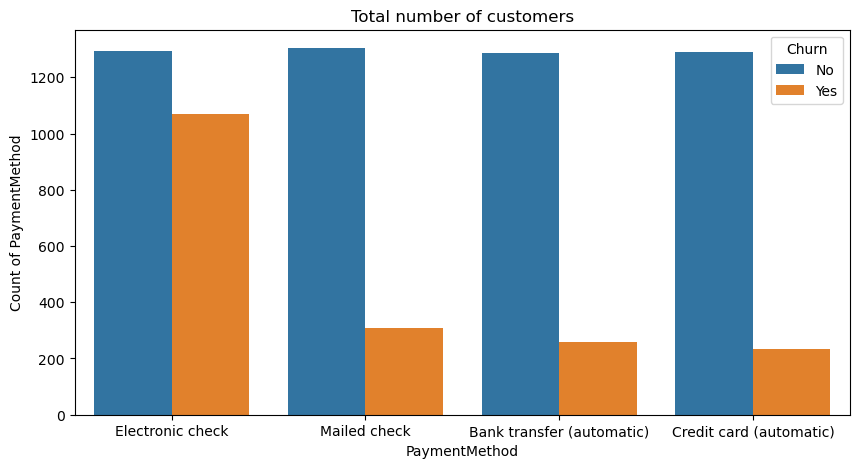

In [300]:
# investigating 'PaymentMethod' by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Count of PaymentMethod')
plt.title('Total number of customers')


## Relationship between internetService and Churn

Text(0.5, 1.0, 'Total number of customers')

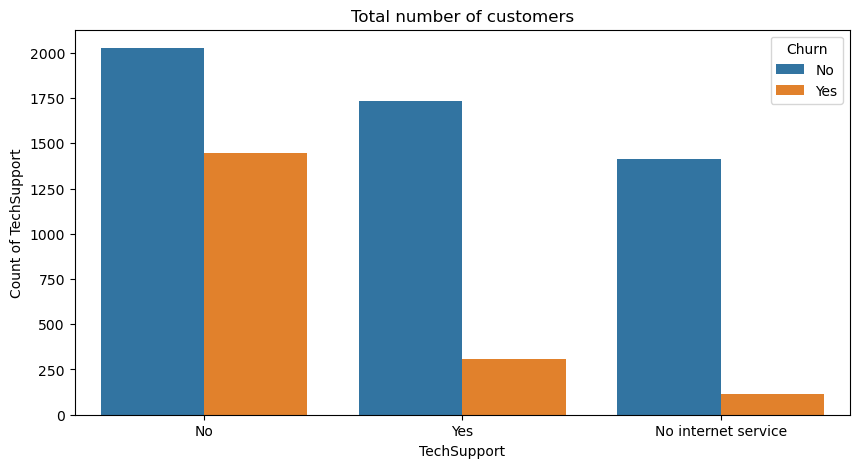

In [301]:
# investigating'TechSupport' by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='TechSupport', data=df, hue='Churn')
plt.xlabel('TechSupport')
plt.ylabel('Count of TechSupport')
plt.title('Total number of customers')

# Phone Service

Text(0.5, 1.0, 'Total number of customers')

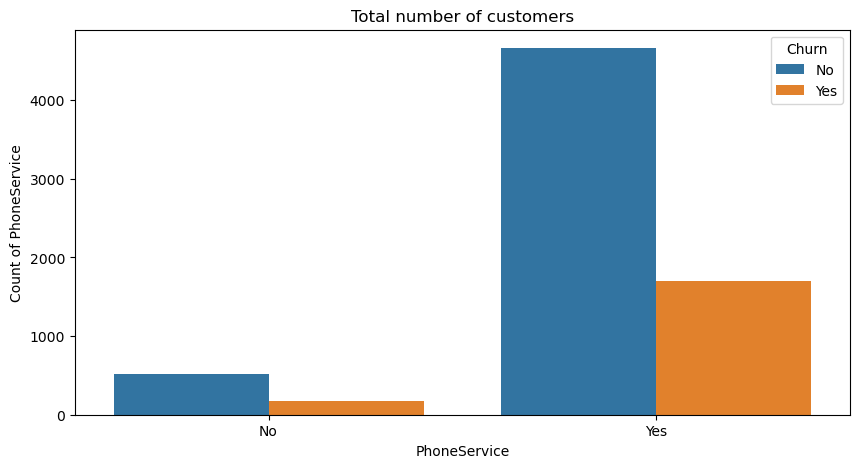

In [302]:
# investigating'PhoneService' by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='PhoneService', data=df, hue='Churn')
plt.xlabel('PhoneService')
plt.ylabel('Count of PhoneService')
plt.title('Total number of customers')

# Payment Method by Customers

Text(0.5, 1.0, 'Total number of customers')

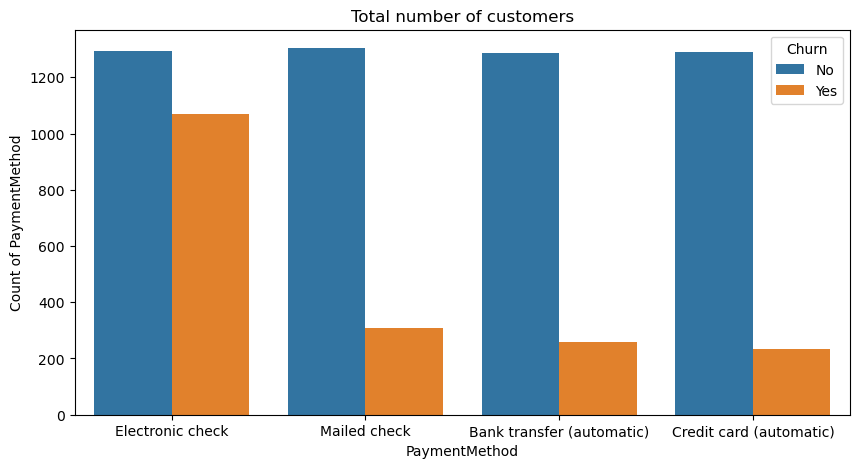

In [306]:
# investigating'PaymentMethod' by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='PaymentMethod', data=df, hue='Churn')
plt.xlabel('PaymentMethod')
plt.ylabel('Count of PaymentMethod')
plt.title('Total number of customers')

# Being a Senior Citizen 

Text(0.5, 1.0, 'Total number of customers')

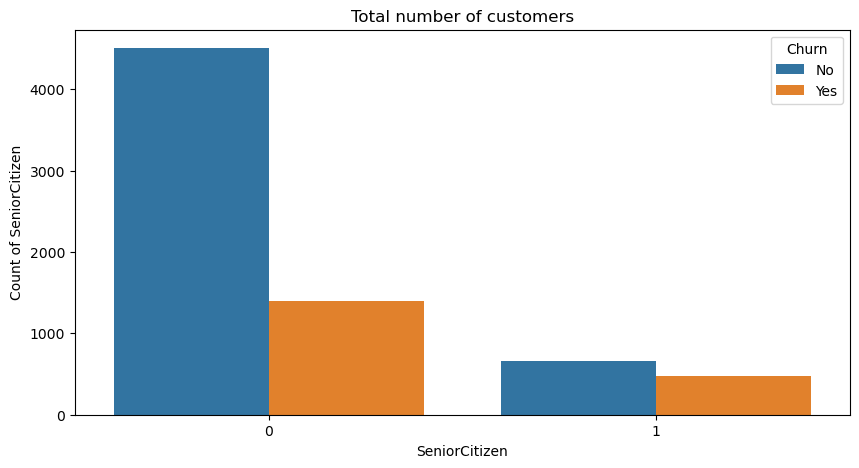

In [309]:
# investigating'SeniorCitizen' by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='SeniorCitizen', data=df, hue='Churn')
plt.xlabel('SeniorCitizen')
plt.ylabel('Count of SeniorCitizen')
plt.title('Total number of customers')

# Being a Contractor

Text(0.5, 1.0, 'Total number of customers')

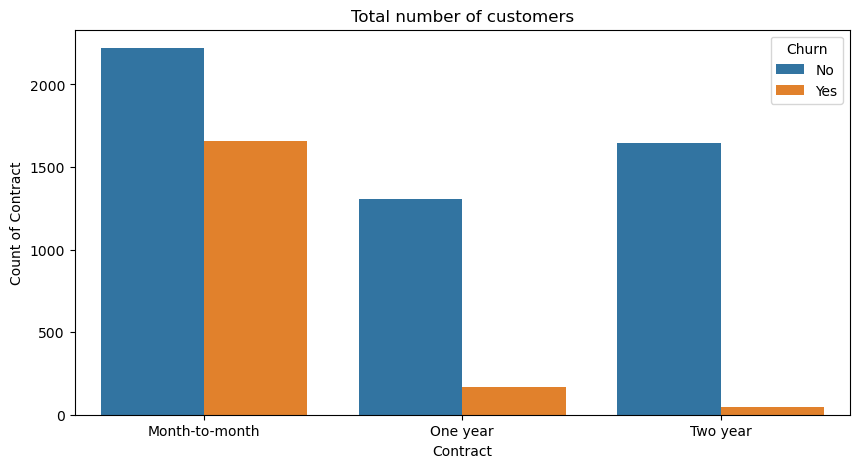

In [310]:
# investigating'Contract' by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='Contract', data=df, hue='Churn')
plt.xlabel('Contract')
plt.ylabel('Count of Contract')
plt.title('Total number of customers')

# Paperless Billing

Text(0.5, 1.0, 'Total number of customers')

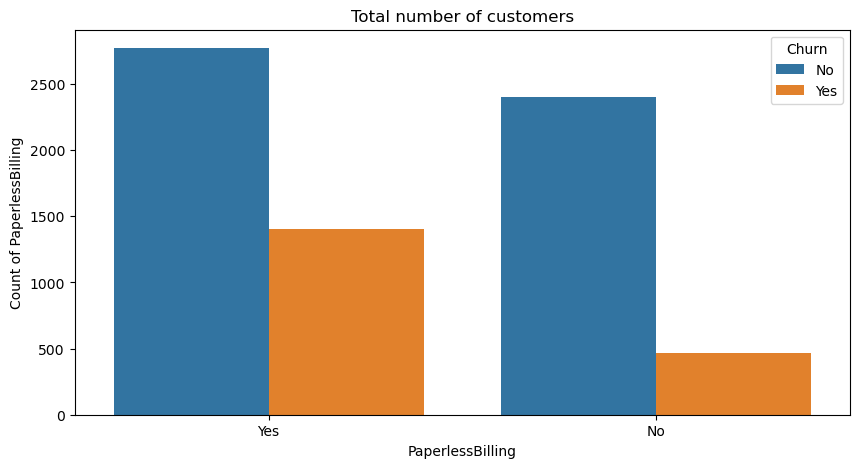

In [311]:
# investigating'PaperlessBilling' by customers
plt.figure(figsize = (10, 5))
sns.countplot(x='PaperlessBilling', data=df, hue='Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count of PaperlessBilling')
plt.title('Total number of customers')

In [420]:
#from sklearn.preprocessing import LabelEncoder

# encode categorical data into num data
cate = df.dtypes == "object"
cat_feat = list(cate[cate].index)

encoder = LabelEncoder()
for x in cat_feat:
    df[x] = encoder.fit_transform(df[x])

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1


# Exploratory Data Analysis-Multivariate Analysis

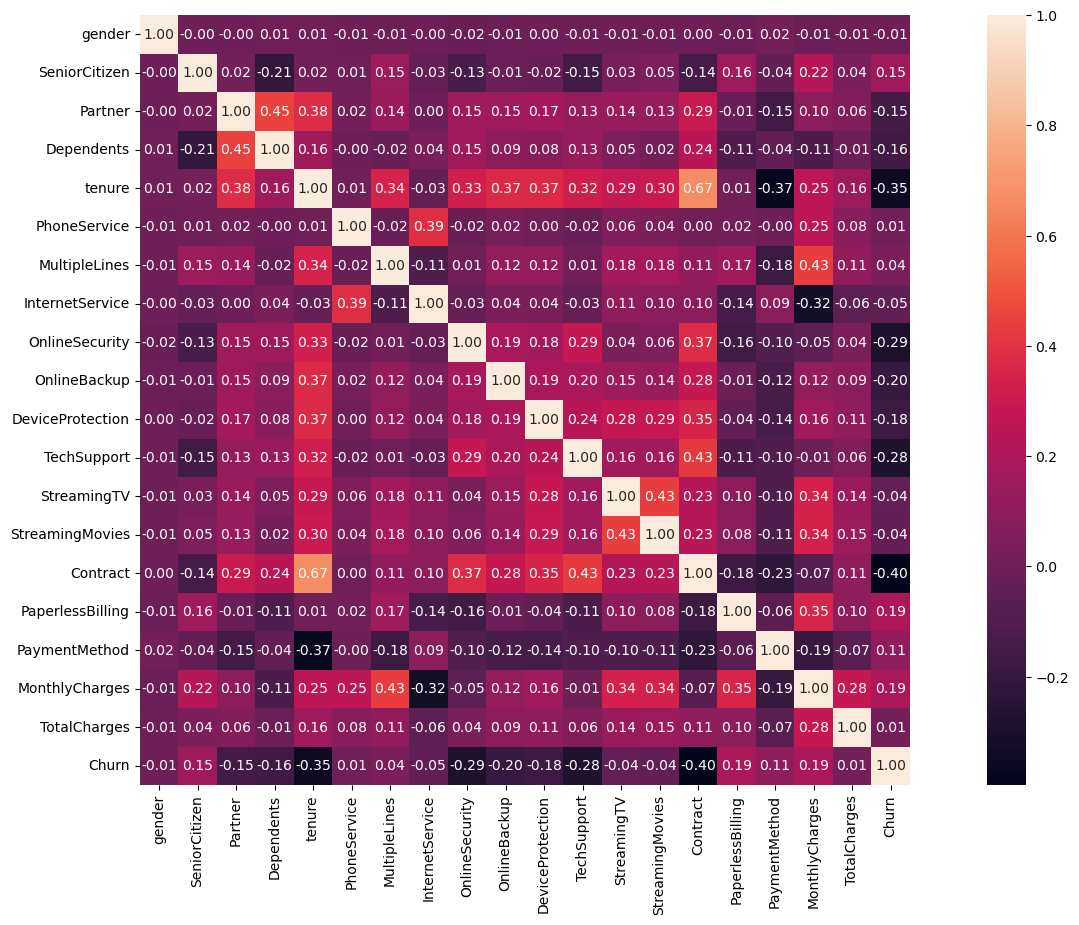

In [421]:
# Correlation between Churn and other variables in the data set
plt.figure(figsize = (20,10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f',
                annot_kws={'size':10})




In [10]:
# load data set
df = pd.read_csv(r"C:\Users\Dr. Ubon Essien\OneDrive\10Alytics_2\CapStoneProject_Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [52]:
#from sklearn.preprocessing import LabelEncoder

# encode categorical data into num data
cate = df.dtypes == "object"
cat_feat = list(cate[cate].index)

encoder = LabelEncoder()
for X in cat_feat:
 df[X] = encoder.fit_transform(df[X])
    
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [562]:
# create a copy of data(exclude target/label along side other columns that were created)

df1 = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', ]]

label = df[['Churn']]


In [564]:
df_copy = df.drop(columns=['customerID', 'Churn'])

print("\nCopied DataFrame without 'customerID' and 'Churn':")
print(df_copy.head())


Copied DataFrame without 'customerID' and 'Churn':
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0          

In [504]:
#from sklearn.preprocessing import LabelEncoder

# encode categorical data into num data
cate = df1.dtypes == "object"
cat_feat = list(cate[cate].index)

encoder = LabelEncoder()
for X in cat_feat:
    df1[X] = encoder.fit_transform(df1[X])
    



# Machine learning

In [565]:
# Split the datal set into tesing and training sets- x=Questions, Y=Answers
X_train, X_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)

In [41]:
# Model Building
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, y_train)

ly_pred = logreg.predict(X_test)

print("Logistic_Regression")
print("Precision:", precision_score(y_test, ly_pred))
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic_Regression
Precision: 0.687089715536105
Accuracy: 0.8092759110269758
Recall: 0.5470383275261324
F1-score: 0.6091173617846749
AUC-ROC: 0.7270604243218706


In [50]:
ly_pred 

array([1, 0, 0, ..., 0, 1, 0])

In [51]:
X_train

array([[1.        , 0.        , 1.        , ..., 0.66666667, 0.52189055,
        0.49555896],
       [1.        , 0.        , 0.        , ..., 0.66666667, 0.6199005 ,
        0.92205207],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.01044776,
        0.3431853 ],
       ...,
       [1.        , 0.        , 1.        , ..., 0.66666667, 0.02885572,
        0.40719755],
       [1.        , 1.        , 0.        , ..., 0.66666667, 0.8079602 ,
        0.05666156],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.01542289,
        0.5957121 ]])

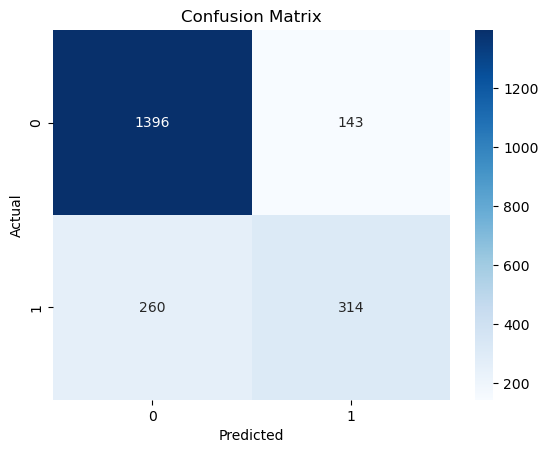

In [42]:
# create a confusion for logistic matrix
lcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#True positives=314, True Negatives=1396. Faslse Negative is 260, while False Positive=143. The model predicted that customer will not churn but in actual they churn(260). Equally predicted that customer will churn but in actual they did not churn(143)

In [568]:
# Random Forest Classifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

rfy_pred = rfc.predict(x_test)

print("RandomForestClassifier")
print("Precision:", precision_score(y_test, rfy_pred))
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1-score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

RandomForestClassifier
Precision: 0.6479400749063671
Accuracy: 0.7913413768630234
Recall: 0.46380697050938335
F1-score: 0.5406249999999999
AUC-ROC: 0.6865366898878963


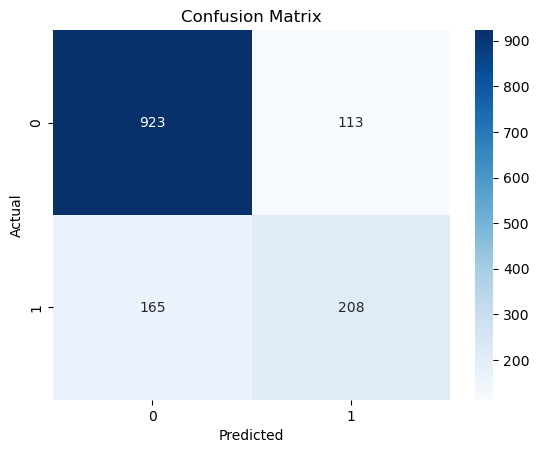

In [340]:
# create a confusion matrix for random forest
rcm = confusion_matrix(y_test, ly_pred)

# visualize the confusion matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

#The model predicted no churn but in actual 165 people churn. On the other hand, the model predicted that customers churn, but in actual they did not, and as a matter of fact about 113 did not churn

In [569]:
# SGDClassifier

SGDC = SGDClassifier()

SGDC.fit(X_train, y_train)

SGDC_pred = SGDC.predict(x_test)

print("SGDClassifier")
print("Precision:", precision_score(y_test, ly_pred))
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1-score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

SGDClassifier
Precision: 0.6806451612903226
Accuracy: 0.8147622427253371
Recall: 0.5656836461126006
F1-score: 0.6178623718887262
AUC-ROC: 0.7350619002763775


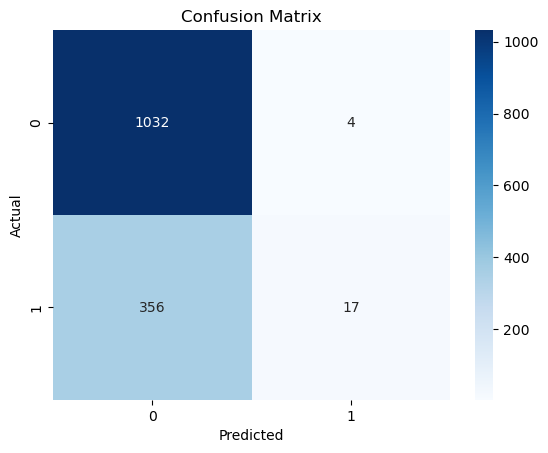

In [342]:
# create a confusion matrix for SGDClassfier
SDGcm = confusion_matrix(y_test, SGDC_pred)

# visualize the confusion matrix
sns.heatmap(SDGcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Identifying and Visualizing the most important variables that affect churn using Random Forest


In [36]:
# load data set
df = pd.read_csv(r"C:\Users\Dr. Ubon Essien\OneDrive\10Alytics_2\CapStoneProject_Customer-Churn.csv")


In [37]:
from sklearn.preprocessing import LabelEncoder

# encode categorical data into num data
cate = df.dtypes == "object"
cat_feat = list(cate[cate].index)

encoder = LabelEncoder()
for x in cat_feat:
    df[x] = encoder.fit_transform(df[x])

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


In [38]:
# Drop 'customerID' and 'Churn' to create the feature DataFrame
X = df.drop(columns=['customerID','Churn'])
y = df['Churn']

print(X.columns)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [31]:
#preprocess the data

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a Random Forest model
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)




RandomForestClassifier(random_state=42)

             Feature  Importance
0             tenure    0.176484
1     MonthlyCharges    0.173920
2       TotalCharges    0.167420
3           Contract    0.083622
4      PaymentMethod    0.053272
5     OnlineSecurity    0.047480
6        TechSupport    0.037978
7       OnlineBackup    0.028224
8             gender    0.027745
9    InternetService    0.027230
10  PaperlessBilling    0.025509
11           Partner    0.024281
12     MultipleLines    0.023819
13     SeniorCitizen    0.021207
14  DeviceProtection    0.020814
15        Dependents    0.019897
16       StreamingTV    0.017667
17   StreamingMovies    0.017617
18      PhoneService    0.005814


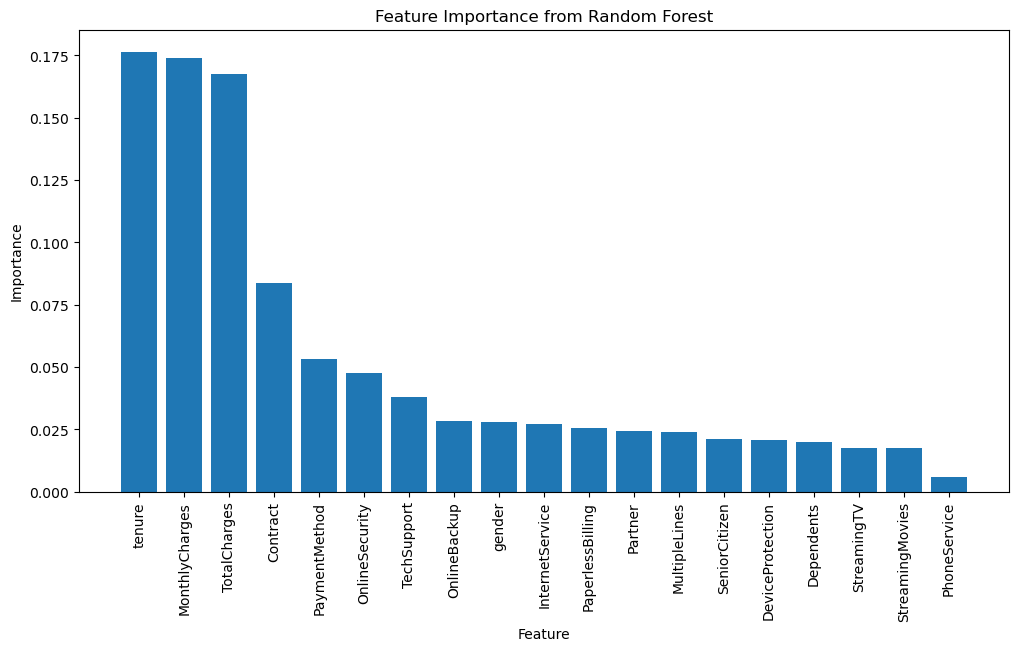

In [637]:
# Get and sort feature importance
importances_rf = model_rf.feature_importances_
indices_rf = np.argsort(importances_rf)[::-1]
features = X.columns

# Create a dataframe of feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features[indices_rf],
    'Importance': importances_rf[indices_rf]
})

# Print the feature importance
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.title("Feature Importance from Random Forest")
plt.bar(range(X_train.shape[1]), importances_rf[indices_rf], align="center")
plt.xticks(range(X_train.shape[1]), features[indices_rf], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()
